### Notebook for noodling with screenshot reading algorithm.

Output should consist of a dataframe that has text, placement, prominence, maybe color?

In [2]:
# Import the usual suspects.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os
import ipdb
import pickle
import string
import sys
import time
import math
import csv
import re
import cv2

Grab test image.

In [3]:
img = cv2.imread("data/ceridian.jpeg")

In [6]:
try:
    from PIL import Image
except ImportError:
    import Image
import pytesseract


In [4]:
pytesseract.image_to_string("data/ceridian.jpeg")

"A new way to pay your people. An epic win for your\ncompany culture. Learn more about Dayforce Wallet\n\n \n\nees Q_ Support Login alll Sales 1-800-729-7655\n\nTol tD)y-N PS ee ee\n\nIntelligence at work\n\nIt takes smart technology to outsmart\na changing world\n\n \n\n   \n\ns, and communities.\n\nRight now, preparing your workforce is the\nsmartest decision you'll make\n\n \n\x0c"

In [16]:
output = pytesseract.image_to_data(image = Image.open('data/ceridian.jpeg'), output_type = pytesseract.Output.DATAFRAME)

Output now contains the full output of tesseract. Columns are as follows:

* **level**: hierarchical layout (a word is in a line, which is in a paragraph, which is in a block, which is in a page), a value from 1 to 5
    * 1: page
    * 2: block
    * 3: paragraph
    * 4: line
    * 5: word
* **page_num**: when provided with a list of images, indicates the number of the file, when provided with a multi-pages document, indicates the page number, starting from 1
* **block_num**: block number within the page, starting from 0
* **par_num**: paragraph number within the block, starting from 0
* **line_num**: line number within the paragraph, starting from 0
* **word_num**: word number within the line, starting from 0
* **left**: x coordinate in pixels of the text bounding box top left corner, starting from the left of the image
* **top**: y coordinate in pixels of the text bounding box top left corner, starting from the top of the image
* **width**: width of the text bounding box in pixels
* **height**: height of the text bounding box in pixels
* **conf**: confidence value, from 0 (no confidence) to 100 (maximum confidence), -1 for all level except 5
* **text**: detected text, empty for all levels except 5

Only retaining words with confidence greater than 50 seems to be a good way to get rid of nonsense, but this might be worth looking into.

Grouping terms by block number is likely the best way to get an idea for the sizes of entire chunks of text.

In [25]:
goodWords = output[output['conf'] > 50]
goodWords.head()

,level,page_num,block_num,par_num,line_num,word_num,left,top,width,height,conf,text
4,5,1,1,1,1,1,468,41,15,16,79,A
5,5,1,1,1,1,2,491,45,43,12,79,new
6,5,1,1,1,1,3,541,45,44,17,95,way
7,5,1,1,1,1,4,592,42,20,15,95,to
8,5,1,1,1,1,5,621,45,39,17,96,pay


We should export the good words dataframe, but I also want to generate a summary dataframe that contains sizes and complete sentences for all blocks. For each block, split by line.

In [ ]:
# Loop over each block.

for block in np.unique(goodWords.block_num) :
    
    tempCat = goodWords[goodWords['block_num'] == block]

In [27]:
np.unique(goodWords.block_num)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [28]:
goodWords[goodWords['block_num'] == 1]

,level,page_num,block_num,par_num,line_num,word_num,left,top,width,height,conf,text
4,5,1,1,1,1,1,468,41,15,16,79,A
5,5,1,1,1,1,2,491,45,43,12,79,new
6,5,1,1,1,1,3,541,45,44,17,95,way
7,5,1,1,1,1,4,592,42,20,15,95,to
8,5,1,1,1,1,5,621,45,39,17,96,pay
9,5,1,1,1,1,6,667,45,48,17,96,your
10,5,1,1,1,1,7,722,40,79,22,96,people.
11,5,1,1,1,1,8,809,41,27,16,96,An
12,5,1,1,1,1,9,844,40,45,22,96,epic
13,5,1,1,1,1,10,896,40,37,17,96,win


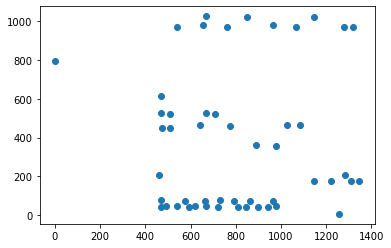

In [29]:
plt.scatter(x=goodWords['left'],y=goodWords['top'])